# 데이터 시각화 I 실습

막대그래프, 선그래프, 히스토그램, 파이차트, 산점도, 박스플롯을 구현해봅니다.

실습에 사용하는 데이터는 https://www.kaggle.com/datasets/nikhil7280/weather-type-classification 데이터입니다.

본인이 원하는 다른 데이터가 있다면 다른 데이터를 사용하셔도 좋습니다.

데이터에서 적절한 데이터를 선정하여 각 시각화 분석에 적용합니다.

시각화를 진행할 때는 차트 뿐만 아니라 범례, 제목, 레이블, 색상, 크기 등 여러가지 요소들을 직접 개발하시면서

데이터의 특성을 잘 이해해보시면 좋을 것 같습니다.

In [ ]:
# 기본 라이브러리
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv('weather_classification_data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


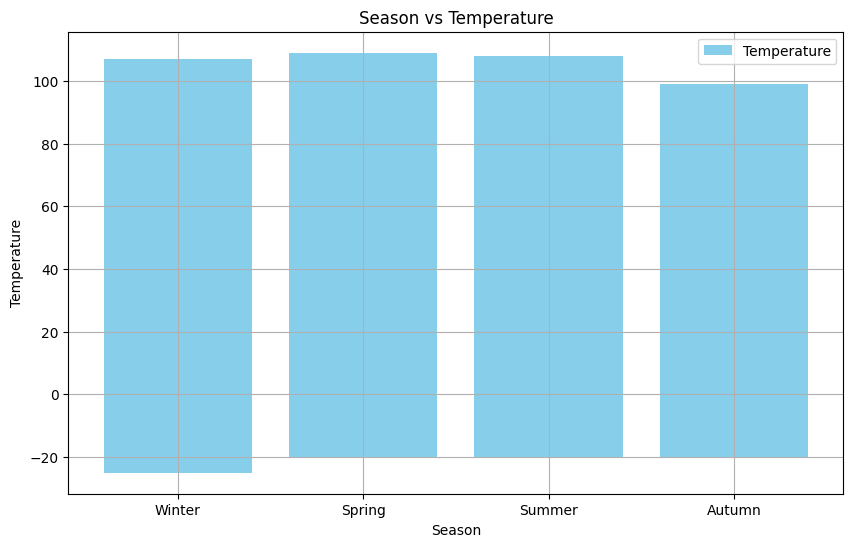

In [ ]:
# 1. 막대그래프
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.bar(data['Season'], data['Temperature'], color='skyblue', label='Temperature')  # 막대그래프 생성
plt.title('Season vs Temperature')  # 제목 추가
plt.xlabel('Season')  # x축 레이블 추가
plt.ylabel('Temperature')  # y축 레이블 추가
plt.legend()  # 범례 추가
plt.grid(True)  # 그리드 추가
plt.show()  # 그래프 출력

In [8]:
data['Weather Type'].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

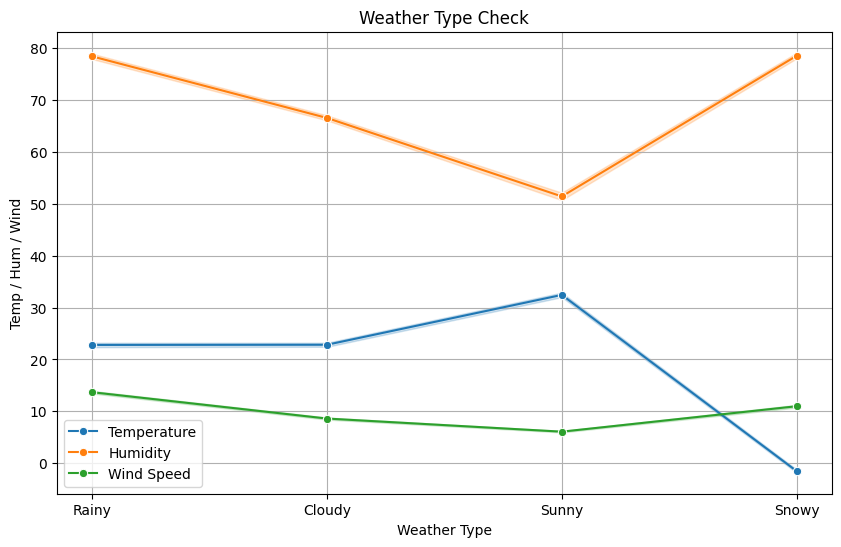

In [9]:
# 2. 선그래프
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.lineplot(x='Weather Type', y='Temperature', data=data, marker='o', label='Temperature')
sns.lineplot(x='Weather Type', y='Humidity', data=data, marker='o', label='Humidity')
sns.lineplot(x='Weather Type', y='Wind Speed', data=data, marker='o', label='Wind Speed')
plt.title('Weather Type Check')  # 제목 추가
plt.xlabel('Weather Type')  # x축 레이블 추가
plt.ylabel('Temp / Hum / Wind')  # y축 레이블 추가
plt.legend()  # 범례 추가
plt.grid(True)  # 그리드 추가
plt.show()

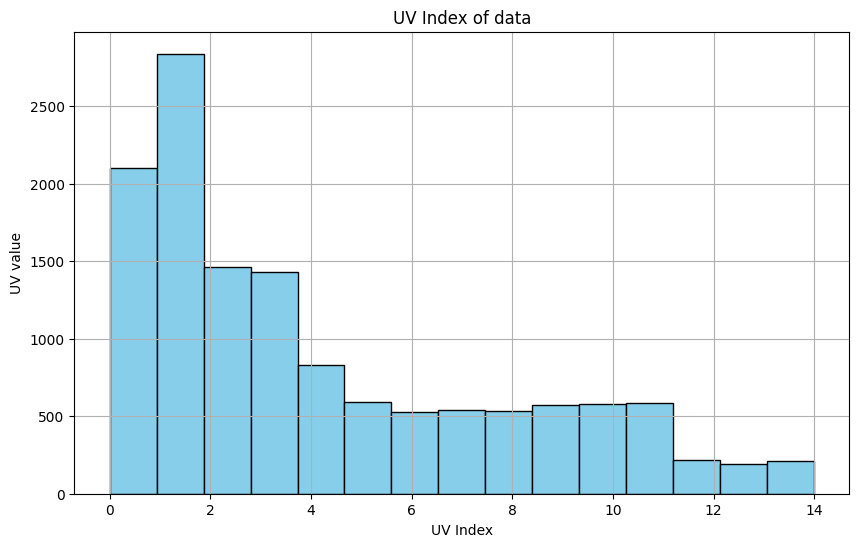

In [17]:
# 3. 히스토그램
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.hist(data['UV Index'], bins=15, color='skyblue', edgecolor='black')
plt.title('UV Index of data')  # 제목 추가
plt.xlabel('UV Index')  # x축 레이블 추가
plt.ylabel('UV value')  # y축 레이블 추가
plt.grid(True)  # 그리드 추가
plt.show()

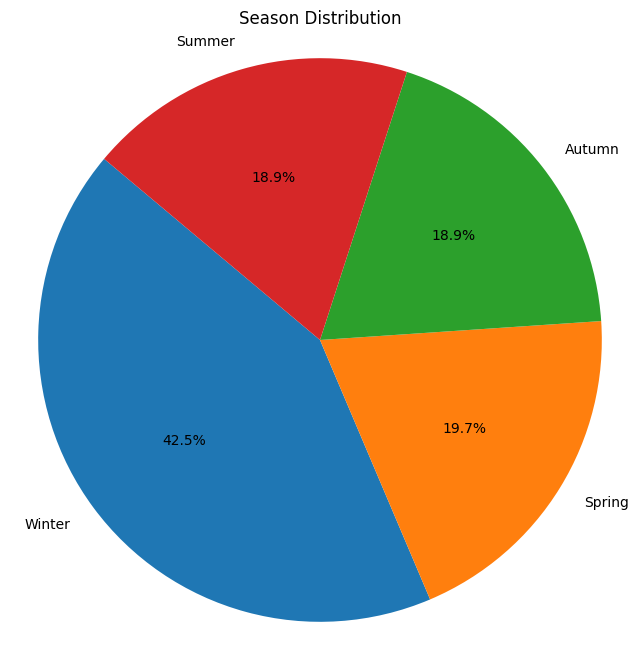

In [21]:
# 4. 파이차트

# Season 컬럼의 데이터 비율 계산
season_counts = data['Season'].value_counts()

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Season Distribution')
plt.axis('equal')  # 파이차트를 원형으로 유지
plt.show()

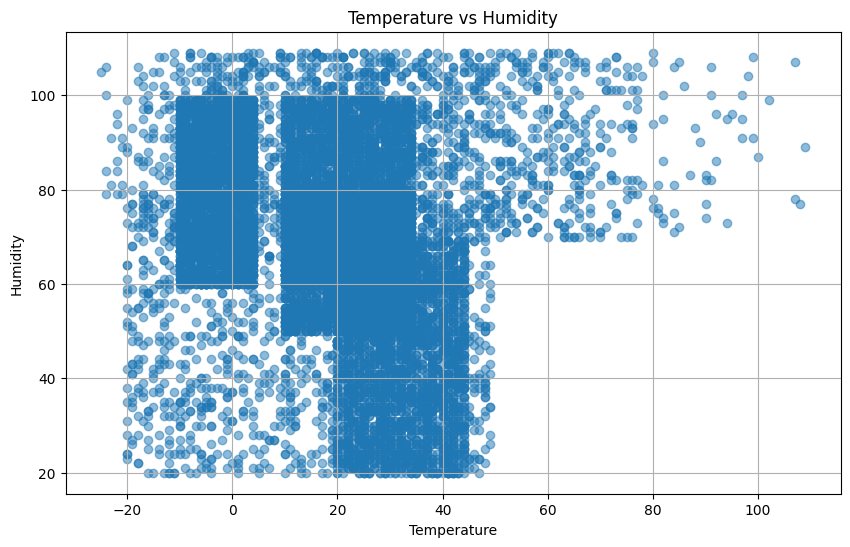

In [22]:
# 5. 산점도
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperature'], data['Humidity'], alpha=0.5)
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.grid(True)
plt.show()

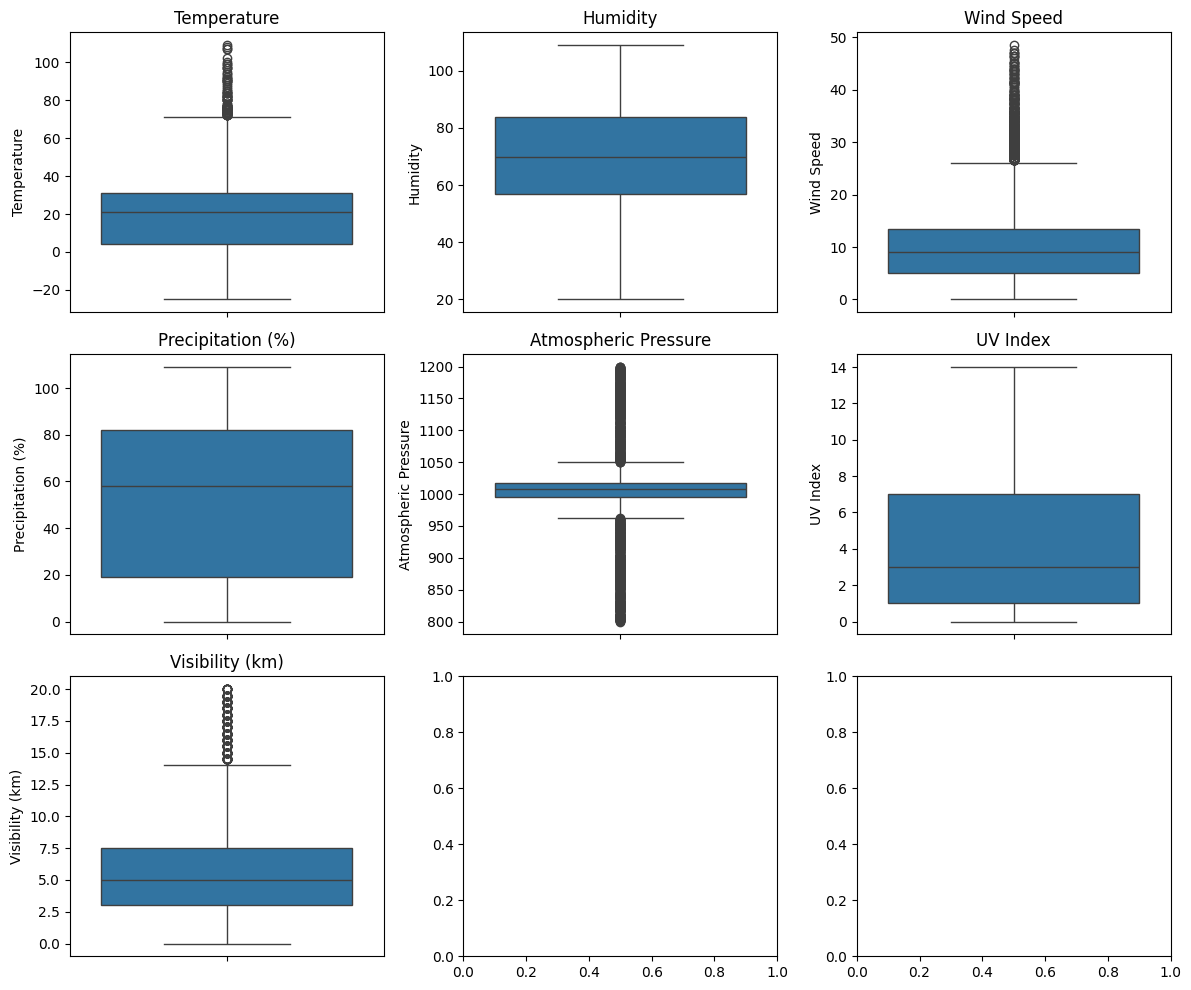

In [25]:
# 6. 박스플롯

numerical_cols=data.select_dtypes(include='number').columns

fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(12,10))
ax = ax.flatten()

for i,col in enumerate(numerical_cols):
    k=sns.boxplot(data=data,y=col,ax=ax[i])
    ax[i].set_title(col)

plt.tight_layout()
plt.show()

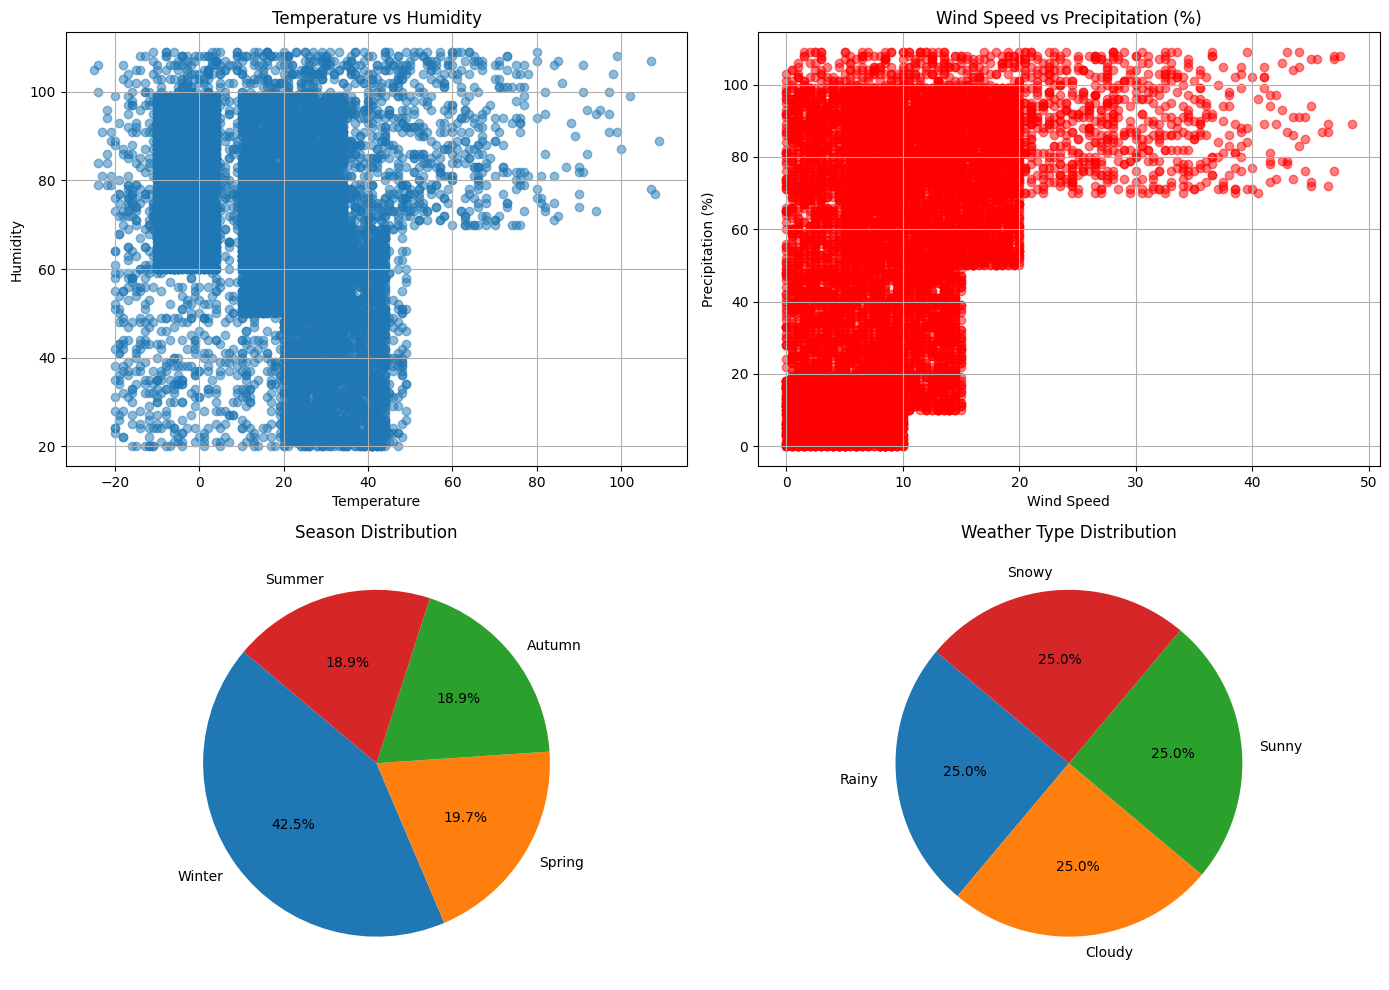

In [26]:
# 7. 여러 시각화 차트 합쳐보기

# Figure와 서브플롯 생성
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Temperature vs Humidity 산점도
axs[0, 0].scatter(data['Temperature'], data['Humidity'], alpha=0.5)
axs[0, 0].set_title('Temperature vs Humidity')
axs[0, 0].set_xlabel('Temperature')
axs[0, 0].set_ylabel('Humidity')
axs[0, 0].grid(True)

# Wind Speed vs Precipitation (%) 산점도
axs[0, 1].scatter(data['Wind Speed'], data['Precipitation (%)'], alpha=0.5, color='r')
axs[0, 1].set_title('Wind Speed vs Precipitation (%)')
axs[0, 1].set_xlabel('Wind Speed')
axs[0, 1].set_ylabel('Precipitation (%)')
axs[0, 1].grid(True)

# Season 분포 파이 차트
season_counts = data['Season'].value_counts()
axs[1, 0].pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=140)
axs[1, 0].set_title('Season Distribution')

# Weather Type 분포 파이 차트
weather_type_counts = data['Weather Type'].value_counts()
axs[1, 1].pie(weather_type_counts, labels=weather_type_counts.index, autopct='%1.1f%%', startangle=140)
axs[1, 1].set_title('Weather Type Distribution')

# 레이아웃 조정
plt.tight_layout()
plt.show()